In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff


#Text Preprocessing libraries
import nltk
nltk.download('stopwords')
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

from nltk.stem import SnowballStemmer

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Techtrix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Techtrix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Techtrix\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_red = "#eb345b"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

In [6]:
df = pd.read_json("Sarcasm/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
is_sarcastic    28619 non-null int64
headline        28619 non-null object
article_link    28619 non-null object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [8]:
df['source_of_text'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df.head()

,is_sarcastic,headline,article_link,source_of_text
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


In [9]:
#Dropping Columns that are not in use
df = df.drop(['article_link'],axis = 1)

In [10]:
df.head()

,is_sarcastic,headline,source_of_text
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion


Text(0.5, 0, 'Source')

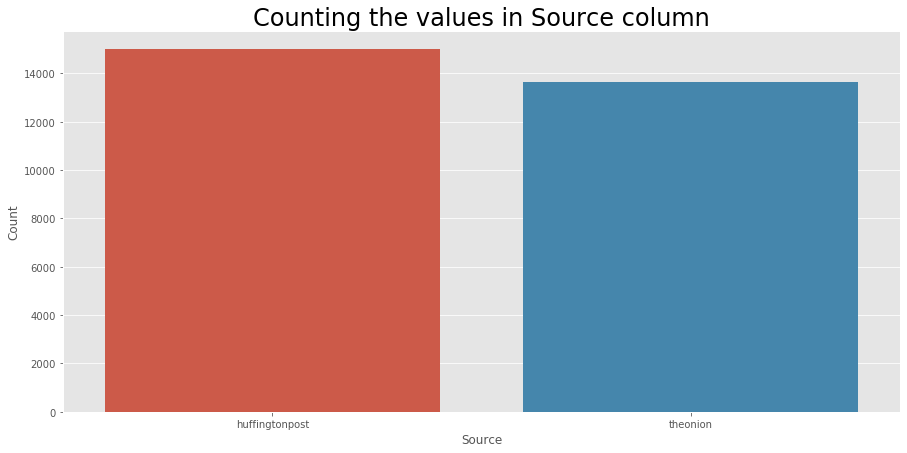

In [15]:
#Plotting style
plt.style.use('ggplot')

#Plotting Bar graph on source of data
target_counts=df['source_of_text'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Counting the values in Source column",fontsize = 24)
plt.ylabel('Count')
plt.xlabel('Source')

In [1]:
#Plotting pie chart using plotty on data
fig = px.pie(df,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_dark')
fig.show()

NameError: name 'px' is not defined

In [16]:
#Preprocessing Data
df['headline']=df['headline'].str.lower()
# Remove the Hashtags from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove the links from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Remove the Special characters from the text 
df['headline']=df['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Substitute the multiple spaces with single spaces
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Remove all the single characters in the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
df['headline']=df['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

#Removing Stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['headline_clean'] = df['headline'].apply(remove_stopwords)
df.head()

,is_sarcastic,headline,source_of_text,headline_clean
0,1,thirtysomething scientists unveil doomsday clo...,theonion,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,dem rep totally nails congress falling short g...
2,0,eat your veggies 9 deliciously different recipes,huffingtonpost,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,theonion,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word stream...,theonion,mother comes pretty close using word streaming...


In [21]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['headline_clean'].apply(lambda x: tokenization(x.lower()))
df.head()

,is_sarcastic,headline,source_of_text,headline_clean,tokenized
0,1,thirtysomething scientists unveil doomsday clo...,theonion,thirtysometh scientist unveil doomsday clock h...,"[thirtysometh, scientist, unveil, doomsday, cl..."
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,dem rep total nail congress fall short gender ...,"[dem, rep, total, nail, congress, fall, short,..."
2,0,eat your veggies 9 deliciously different recipes,huffingtonpost,eat veggi 9 delici differ recip,"[eat, veggi, 9, delici, differ, recip]"
3,1,inclement weather prevents liar from getting t...,theonion,inclement weather prevent liar get work,"[inclement, weather, prevent, liar, get, work]"
4,1,mother comes pretty close to using word stream...,theonion,mother come pretti close use word stream correct,"[mother, come, pretti, close, use, word, strea..."


In [22]:
#Print 10 Sarcastic headlines
sarcastic = df[df['is_sarcastic']==0]['headline_clean']
sarcastic[:10]

1     dem rep total nail congress fall short gender ...
2                       eat veggi 9 delici differ recip
5                                         white inherit
6                            5 way file tax less stress
9                              lot parent know scenario
10              lesbian consideredfath indiana amaz one
11            amanda peet told daughter sex isspeci hug
12                  know regard current treatment ebola
13    chris christi suggest hillari clinton blame bo...
15    uber ceo travi kalanick step trump econom advi...
Name: headline_clean, dtype: object

In [23]:
#Print 10 Non-Sarcastic headlines
not_sarcastic = df[df['is_sarcastic']==1]['headline_clean']
not_sarcastic[:10]

0     thirtysometh scientist unveil doomsday clock h...
3               inclement weather prevent liar get work
4      mother come pretti close use word stream correct
7     richard bransonglob warm donat near much cost ...
8     shadow govern get larg meet marriott confer ro...
14                ford develop new suv run pure gasolin
16          area boy enter jump touch top doorway phase
17                               area man travel gurney
21    guard video game strict order repeat pace stre...
25      secret servic agent secret david alan grier fan
Name: headline_clean, dtype: object

In [ ]:
#stemmer = nltk.SnowballStemmer("english")

#def stemm_text(text):
#    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
#    return text

#df['headline_clean'] = df['headline_clean'].apply(stemm_text)
#df.head()

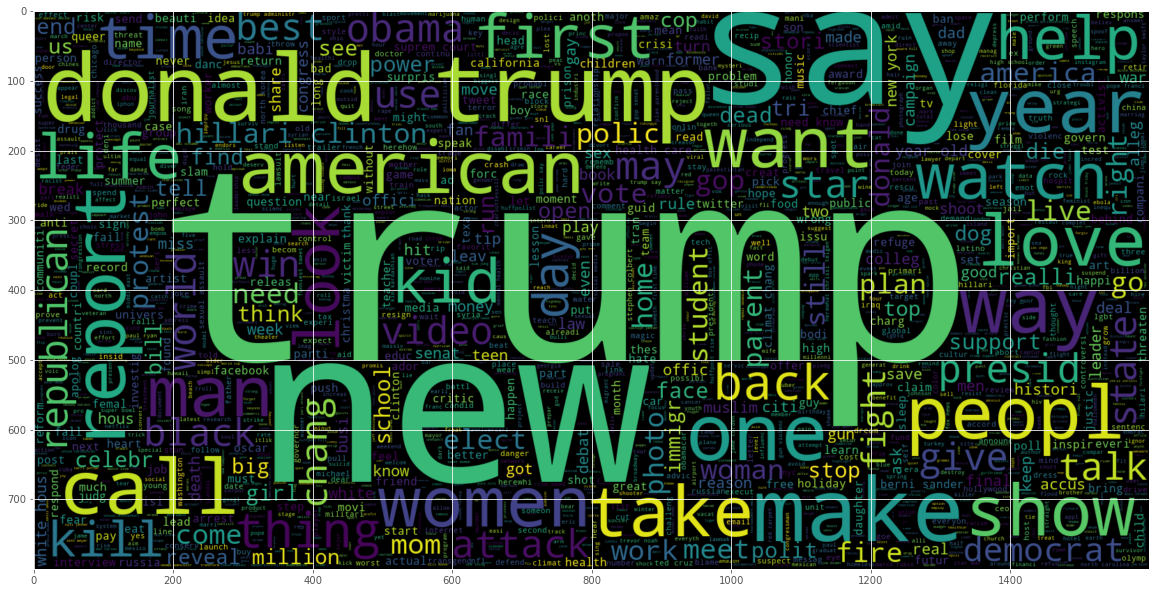

In [24]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

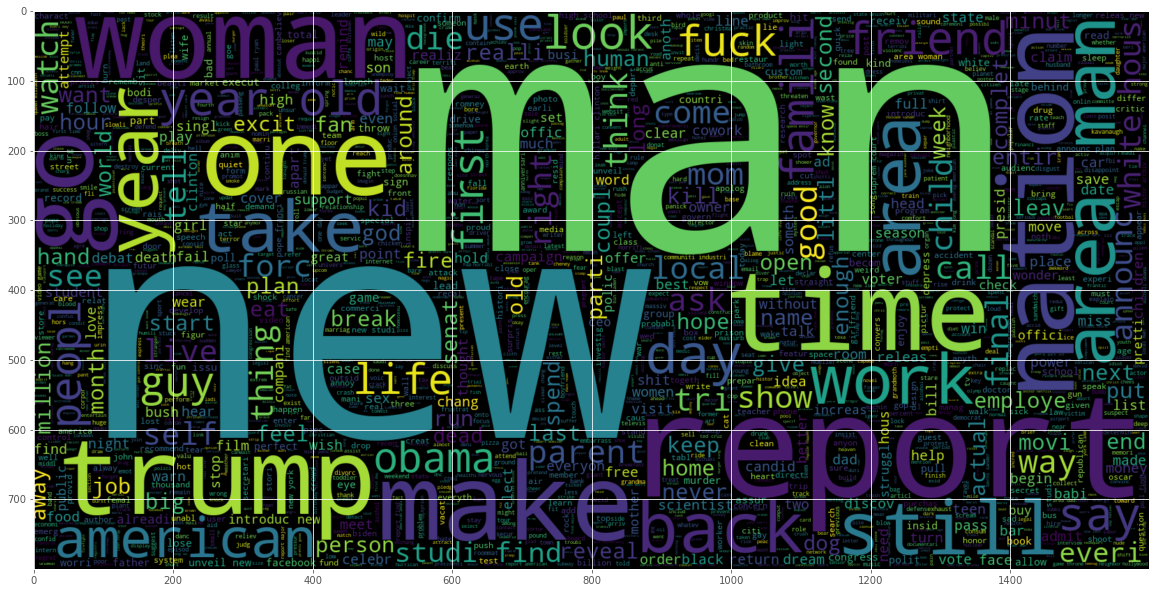

In [25]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

In [26]:
#THE TOP 100 MOST FREQUENTLY OCCURING WORDS IN HEADLINE DATA
all_words=[]
for i in range(len(df['tokenized'])):
    a=df['tokenized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',template= "plotly_dark",title='100 Most Common Words In Headline')
fig.show()

In [27]:
#Spliting it into training and testing 
X = df['headline_clean']
y = df['is_sarcastic']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22895 22895
5724 5724
